In [1]:
import requests

ModuleNotFoundError: No module named 'requests'

In [5]:
import requests
import pandas as pd

url = "https://api.coingecko.com/api/v3/coins/list"

response = requests.get(url)
response.raise_for_status()

coins = response.json()

df = pd.DataFrame(coins)

df.head()

,id,symbol,name
0,_,gib,༼ つ ◕_◕ ༽つ
1,000-capital,000,000 Capital
2,01111010011110000110001001110100-token,01111010011110000110001001110100,01111010011110000110001001110100
3,0chain,zcn,Zus
4,0-knowledge-network,0kn,0 Knowledge Network


In [6]:
import pandas as pd
import requests

url = "https://api.coingecko.com/api/v3/coins/list"
response = requests.get(url)
coins_df = pd.DataFrame(response.json())

coins_df[coins_df['name'].str.contains("Bitcoin|Ethereum|Cardano", case=False)]

,id,symbol,name
121,99-bitcoins,99btc,99 Bitcoins
145,aarna-atv-usdc-ethereum,atvusdc,aarna atv USDC (Ethereum)
1522,baby-bitcoin-2,babybtc,Baby BitCoin
1523,baby-bitcoin-3,babybtc,Baby Bitcoin
1550,baby-ethereum,babyeth,Baby Ethereum
...,...,...,...
18396,wrapped-ethereum-classic-universal,uetc,Wrapped Ethereum Classic (Universal)
18397,wrapped-ethereum-name-service-universal,uens,Wrapped Ethereum Name Service (Universal)
18398,wrapped-ethereum-sollet,soeth,Wrapped Ethereum (Sollet)
18434,wrapped-goat-bitcoin,wgbtc,Wrapped Goat Bitcoin


In [7]:
import pandas as pd
import requests

url = "https://api.coingecko.com/api/v3/coins/list"
response = requests.get(url)
coins_df = pd.DataFrame(response.json())

print(f"Total de moedas encontradas: {len(coins_df)}")
coins_df.head()


Total de moedas encontradas: 19310


,id,symbol,name
0,_,gib,༼ つ ◕_◕ ༽つ
1,000-capital,000,000 Capital
2,01111010011110000110001001110100-token,01111010011110000110001001110100,01111010011110000110001001110100
3,0chain,zcn,Zus
4,0-knowledge-network,0kn,0 Knowledge Network


In [8]:
coins_df[coins_df['name'].str.lower().str.contains('bitcoin')]


,id,symbol,name
121,99-bitcoins,99btc,99 Bitcoins
1522,baby-bitcoin-2,babybtc,Baby BitCoin
1523,baby-bitcoin-3,babybtc,Baby Bitcoin
2082,bido-staked-bitcoin,stbtc,Bido Staked Bitcoin
2094,big-back-bitcoin,bbbtc,Big Back Bitcoin
...,...,...,...
18321,wrapped-bitcoin-pulsechain,wbtc,Wrapped Bitcoin (PulseChain)
18322,wrapped-bitcoin-sollet,sobtc,Wrapped Bitcoin (Sollet)
18323,wrapped-bitcoin-universal,ubtc,Wrapped Bitcoin (Universal)
18434,wrapped-goat-bitcoin,wgbtc,Wrapped Goat Bitcoin


In [12]:
import requests
import pandas as pd

coins_df[coins_df['id'] == 'bitcoin']

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {"vs_currency": "usd", "days": "90"}

response = requests.get(url, params=params)
data = response.json()

In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt 

url = "https://api.coingecko.com/api/v3/coins/butcoin/marlet_chart"
params = {"vs_currency": "usd", "days": "90"}

response = requests.get(url, params=params)
data = response.json()

prices = data["prices"]
df= pd.DataFrame(prices, columns=["timestamp", "price"])
df["date"] = pd.to_datetime(df["timestamp"], unit="ms")
print(df.head())

plt.figure(figszie=(10,5))
plt.plot(df["date"], df["price"], label="Bitcoin (USD)", linewidth=2)
plt.title("Variação do Preço do Bitcoin nos Últimos 90 Dias")
plt.xlabel("Data")
plt.ylabel("Preço em USD")
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'prices'

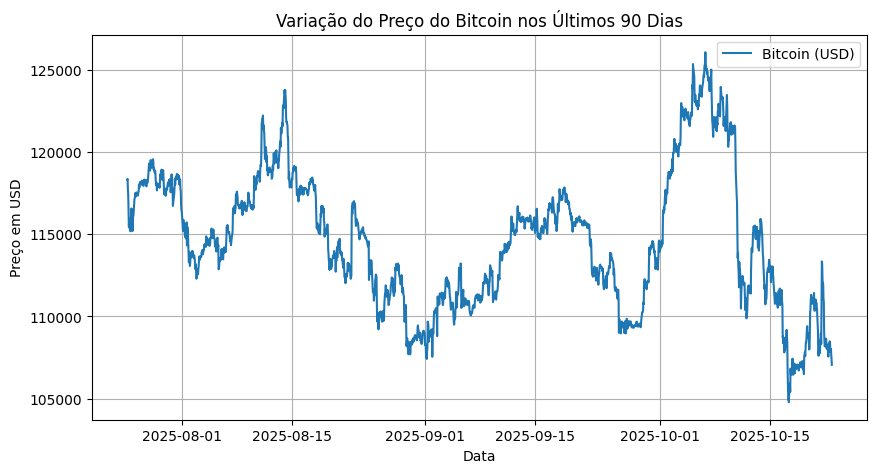

In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# URL correta
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {"vs_currency": "usd", "days": "90"}  # últimos 90 dias

# Requisição
response = requests.get(url, params=params)
data = response.json()

# Verificar se a chave "prices" existe
if "prices" in data:
    prices = data["prices"]
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["date"] = pd.to_datetime(df["timestamp"], unit="ms")
    
    # Gráfico
    plt.figure(figsize=(10,5))
    plt.plot(df["date"], df["price"], label="Bitcoin (USD)")
    plt.title("Variação do Preço do Bitcoin nos Últimos 90 Dias")
    plt.xlabel("Data")
    plt.ylabel("Preço em USD")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("A chave 'prices' não foi encontrada na resposta da API. Confira a URL e os parâmetros.")


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

coins = ["bitcoin", "ethereum", "cardano"]

dataframes = {}

for coin in coins:
    url = f"https://api.coingecko.com/api/v3/coins/{coin}/market_chart"
    params = {"vs_currency": "usd", "days": "90"}
    response = requests.get(url, params=params)
    data = response.json()

    prices = pd.DataFrame(data["prices"], columns=["timestamp", "price"])
    prices["date"] = pd.to_datetime(prices["timestamp"], unit="ms")
    prices.drop("timestamp", axis=1, inplace=True)

    dataframes[coin] = prices

    print("Dados baixados com sucesso!")
    for coin in dataframes:
        print(f"{coin}: {len(dataframes[coin])}registros")

Dados baixados com sucesso!
bitcoin: 2162registros
Dados baixados com sucesso!
bitcoin: 2162registros
ethereum: 2163registros
Dados baixados com sucesso!
bitcoin: 2162registros
ethereum: 2163registros
cardano: 2162registros


c:\Users\evy12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
c:\Users\evy12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
c:\Users\evy12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\patches.py:797: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
c:\Users\evy12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2037: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
c:\Users\evy12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine

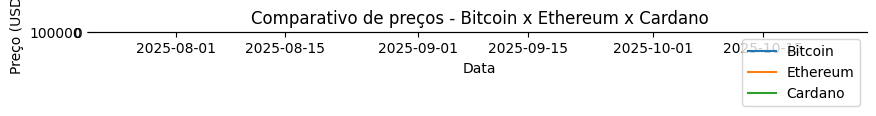

In [6]:
plt.figure(figsize=(10,0))

for coin in dataframes:
    plt.plot(dataframes[coin]["date"], dataframes[coin]["price"], label= coin.capitalize())

plt.title("Comparativo de preços - Bitcoin x Ethereum x Cardano")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.show()



c:\Users\evy12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
c:\Users\evy12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
c:\Users\evy12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\patches.py:797: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
c:\Users\evy12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2037: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
c:\Users\evy12\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine

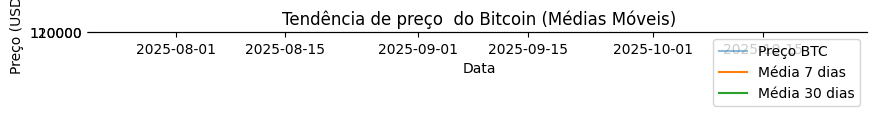

In [7]:
for coin in dataframes:
    df = dataframes[coin]
    df["media_movel_7d"] = df["price"].rolling(window=7).mean()
    df["media_movel_30d"]= df["price"].rolling(window=30).mean()

plt.figure(figsize=(10,0))   
plt.plot(dataframes["bitcoin"]["date"], dataframes["bitcoin"]["price"], label="Preço BTC", alpha=0.5)
plt.plot(dataframes["bitcoin"]["date"], dataframes["bitcoin"]["media_movel_7d"], label="Média 7 dias")
plt.plot(dataframes["bitcoin"]["date"], dataframes["bitcoin"]["media_movel_30d"],label="Média 30 dias")
plt.title("Tendência de preço  do Bitcoin (Médias Móveis)")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

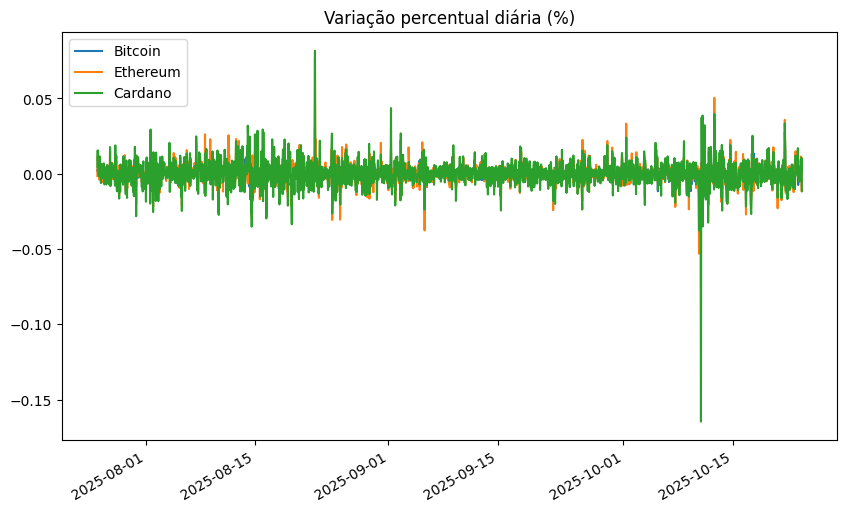

In [8]:
returns = pd.DataFrame()

for coin in dataframes:
    df = dataframes[coin]
    df[f"{coin}_return"] = df["price"].pct_change()
    returns = pd.concat([returns, df.set_index("date")[f"{coin}_return"]], axis=1)

plt.figure(figsize=(10,6))
returns.plot(title="Variação percentual diária (%)", figsize=(10,6))
plt.legend([coin.capitalize() for coin in coins])
plt.show()

In [9]:
correlation = returns.corr()
print("Correlação entre moedas:")
print(correlation)

Correlação entre moedas:
                 bitcoin_return  ethereum_return  cardano_return
bitcoin_return         1.000000              1.0        0.826034
ethereum_return        1.000000              1.0        1.000000
cardano_return         0.826034              1.0        1.000000


In [10]:
for coin in dataframes:
    dataframes[coin].to_csv(f"{coin}_data.csv", index=False)
print("Arquivos CSV salvos com sucesso!")

Arquivos CSV salvos com sucesso!


In [11]:
for coin, df in dataframes.items():
    print(f"{coin}:")
    print(df.isnull().sum())

bitcoin:
price               0
date                0
media_movel_7d      6
media_movel_30d    29
bitcoin_return      1
dtype: int64
ethereum:
price               0
date                0
media_movel_7d      6
media_movel_30d    29
ethereum_return     1
dtype: int64
cardano:
price               0
date                0
media_movel_7d      6
media_movel_30d    29
cardano_return      1
dtype: int64


In [12]:
for coin, df in dataframes.items():
    dataframes[coin]= df.dropna()

In [14]:
for coin, df in dataframes. items():
    df["ma_7"] = df["price"].rolling(window=7).mean()

C:\Users\evy12\AppData\Local\Temp\ipykernel_26008\3019812839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ma_7"] = df["price"].rolling(window=7).mean()


In [15]:
df["ma_7"].fillna(df["price"], inplace=True)  # preenche com o próprio preço


C:\Users\evy12\AppData\Local\Temp\ipykernel_26008\1622927555.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ma_7"].fillna(df["price"], inplace=True)  # preenche com o próprio preço
C:\Users\evy12\AppData\Local\Temp\ipykernel_26008\1622927555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ma_7"].fillna(df["price"], inplace=Tru

In [8]:
import pandas as pd

df = pd.read_csv("ethereum_data.csv")

df["Price_M"] = df["price"] / 1_000_000

df["Price_M"] = df["Price_M"].round(2)

df.to_csv("bitcoin_data_updated.csv", index=False)